# Решающие деревья и метод случайного леса

Импорт необходимых библиотек

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Используем датасет ирисов фишера <br>
Разделение на обучающую и тестовую выборку <br>
Построим одно решающее дерево, а затем случайный лес <br>
Визуализируем построенное решающее дерево

In [8]:
iris = load_iris()
# convert to pandas df
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['target_names'] = iris_df['target'].apply(lambda x: iris.target_names[x])
iris_df = iris_df.sample(frac=1).reset_index(drop=True)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,4.6,3.2,1.4,0.2,0,setosa
1,6.5,3.0,5.8,2.2,2,virginica
2,5.4,3.4,1.7,0.2,0,setosa
3,4.8,3.4,1.9,0.2,0,setosa
4,7.4,2.8,6.1,1.9,2,virginica
5,6.2,2.2,4.5,1.5,1,versicolor
6,4.4,3.0,1.3,0.2,0,setosa
7,6.0,2.7,5.1,1.6,1,versicolor
8,7.9,3.8,6.4,2.0,2,virginica
9,5.4,3.4,1.5,0.4,0,setosa


In [3]:
dataset = load_iris()
X, Y = dataset.data, dataset.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42, stratify = Y)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.86      0.80      0.83        15
           2       0.81      0.87      0.84        15

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45



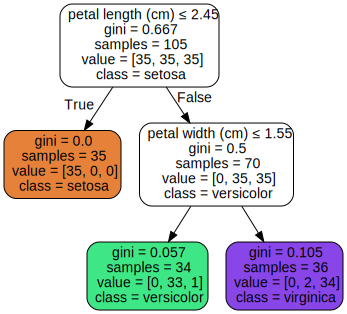

In [4]:
modelTree = DecisionTreeClassifier(max_depth = 2, random_state = 42)
modelTree.fit(X_train, Y_train)

dot_data = export_graphviz(modelTree, out_file = None,
                           feature_names = dataset.feature_names,
                           class_names = dataset.target_names,
                           filled = True, rounded = True,
                           special_characters = True)

modelTree_pred = modelTree.predict(X_test)
print(classification_report(Y_test, modelTree_pred))

graph = graphviz.Source(dot_data)
graph


In [5]:
modelRF = RandomForestClassifier(n_estimators = 1, max_depth = None)
modelRF.fit(X_train, Y_train)
modelRF_pred = modelRF.predict(X_test)
print(classification_report(Y_test, modelRF_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.93      0.90        15
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



Random forest возвращает оценки важности признаков

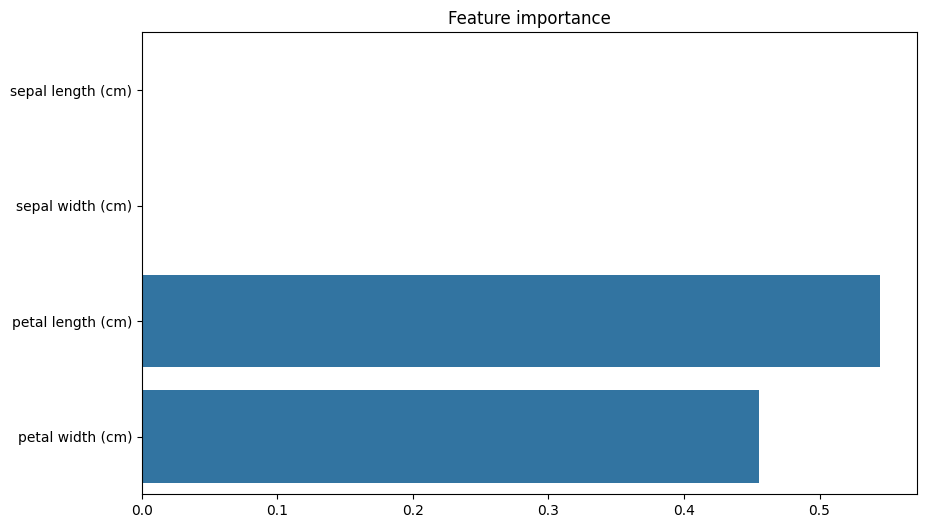

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(x = modelTree.feature_importances_, y = dataset.feature_names)
plt.title("Feature importance")
plt.show()

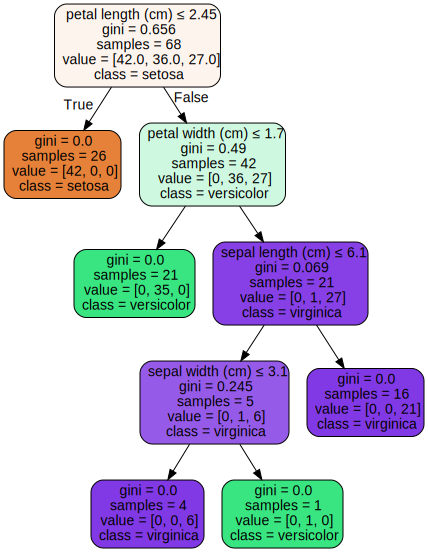

In [7]:
tree = modelRF.estimators_[0]
dot_data = export_graphviz(tree, out_file=None,
                           feature_names = dataset.feature_names,
                           class_names = dataset.target_names,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("tree")
graph